In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
nabs = gpd.read_file('../data/neighborhood_association_boundaries.geojson')
print(nabs.crs)
nabs.head( )

EPSG:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."


In [3]:
type(nabs)

geopandas.geodataframe.GeoDataFrame

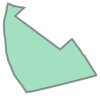

In [4]:
nabs.loc[0, 'geometry']

In [5]:
print(nabs.loc[0, 'geometry'])

MULTIPOLYGON (((-86.79511056795417 36.17575964963348, -86.79403325521203 36.176723819622765, -86.79395847673587 36.176734201205555, -86.79373059621346 36.17641850227536, -86.79345684770965 36.176007328547804, -86.7933653702227 36.17592609720739, -86.79294909679425 36.17527664780614, -86.79276591717007 36.175119620028575, -86.79252941560033 36.17471240878589, -86.79204396927803 36.17393170332863, -86.79167790414918 36.17334940652481, -86.7916936044697 36.17329298843413, -86.79203101691085 36.1731861114189, -86.79474163086816 36.17249213438422, -86.79601903802255 36.17218267273473, -86.79764416397879 36.17179978743778, -86.79830164245051 36.17168336043859, -86.79879977448026 36.17243166386886, -86.79924036890505 36.1729960002125, -86.79949254372757 36.1733962443001, -86.7996258521679 36.17371402180879, -86.79978177579596 36.174123950856526, -86.8000340272343 36.17467828643516, -86.80014485213776 36.17518521060327, -86.80021778306909 36.17542866685226, -86.80031177458922 36.17668510380093

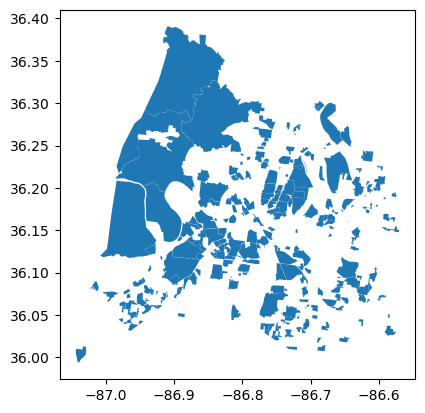

In [6]:
nabs.plot();

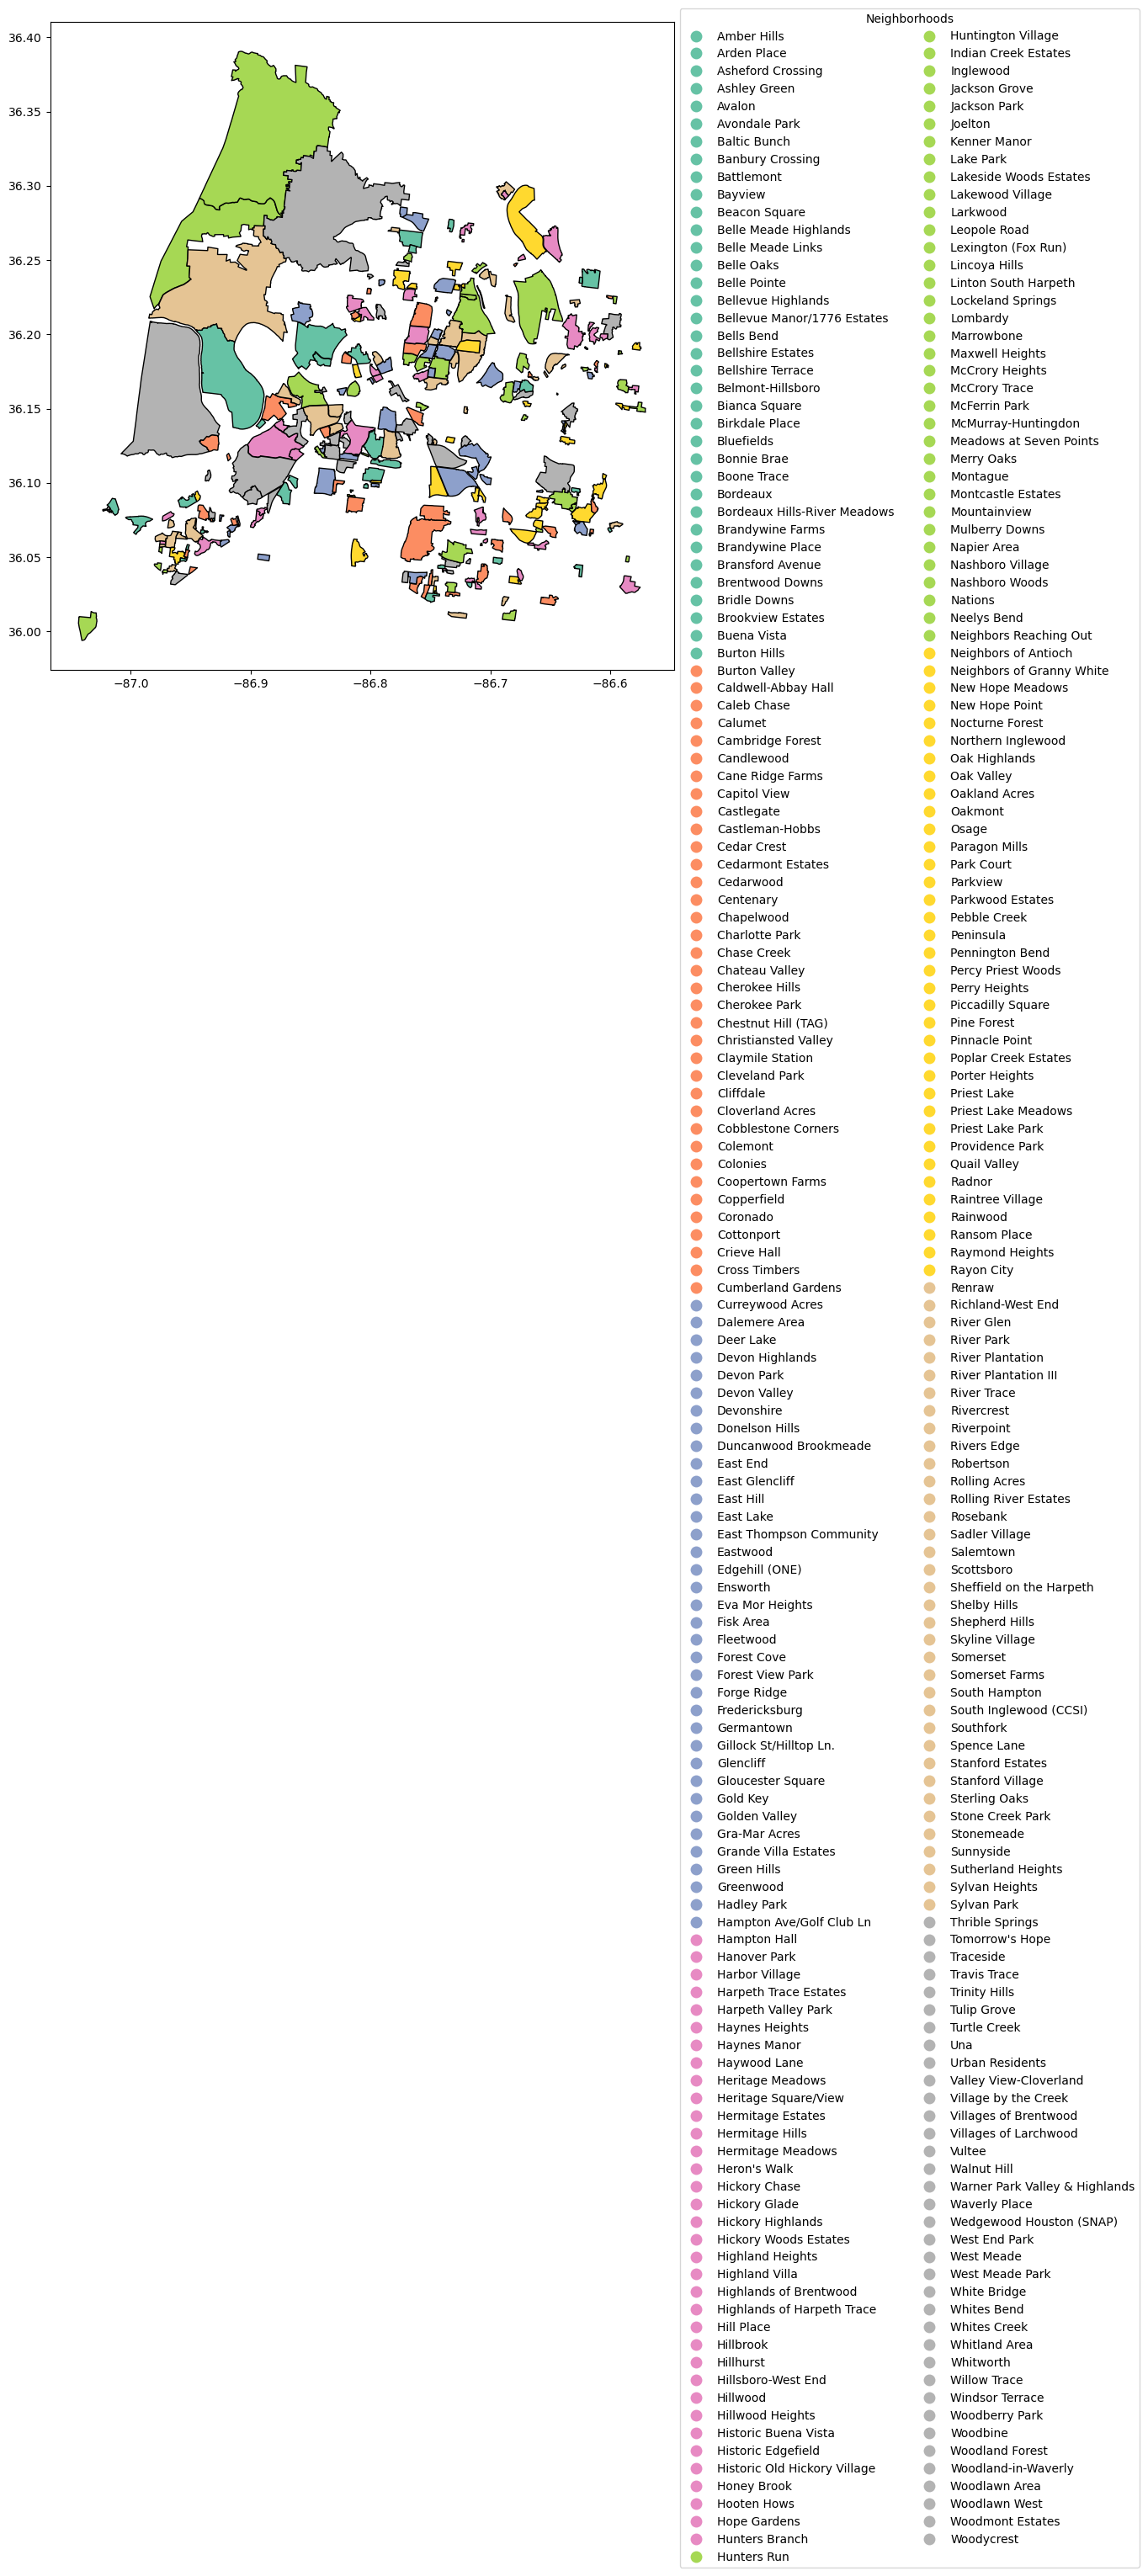

In [10]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Neighborhoods', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}
nabs.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [11]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [12]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop      2524 non-null   object 
 1   route     2524 non-null   object 
 2   location  2524 non-null   object 
 3   lat       2524 non-null   float64
 4   lng       2524 non-null   float64
dtypes: float64(2), object(3)
memory usage: 98.7+ KB


In [13]:
nabs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = nabs.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [15]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
stops_by_nab = gpd.sjoin(bus_geo, nabs, predicate = 'within')

In [17]:
stops_by_nab.head()

,stop,route,location,lat,lng,geometry,index_right,name
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.78090 36.14264),215,Edgehill (ONE)
164,12TH AVE S & HORTON AVE NB,12TH AVENUE SOUTH,"(36.139606, -86.787525)",36.139606,-86.787525,POINT (-86.78753 36.13961),215,Edgehill (ONE)
271,EDGEHILL AVE & HILLSIDE AVE EB,MIDTOWN,"(36.14194, -86.781058)",36.141940,-86.781058,POINT (-86.78106 36.14194),215,Edgehill (ONE)
352,EDGEHILL AVE & 14TH AVE S EB,BELMONT,"(36.142945, -86.789543)",36.142945,-86.789543,POINT (-86.78954 36.14294),215,Edgehill (ONE)
478,12TH AVE S & ARGYLE AVE NB,12TH AVENUE SOUTH,"(36.137677, -86.788074)",36.137677,-86.788074,POINT (-86.78807 36.13768),215,Edgehill (ONE)


In [18]:
stops_by_nab['name'].value_counts()

name
Urban Residents      46
Sunnyside            31
Lockeland Springs    29
Bordeaux             29
Edgehill (ONE)       28
                     ..
Whites Creek          1
Waverly Place         1
Woodbine              1
Fredericksburg        1
Lincoya Hills         1
Name: count, Length: 70, dtype: int64

In [19]:
stops_in_sunnyside = stops_by_nab.loc[stops_by_nab['name'] == 'Sunnyside']
stops_in_sunnyside.shape

(31, 8)

In [29]:
polygon_sunnyside = nabs.loc[nabs['name'] == 'Sunnyside']
polygon_sunnyside.shape

(1, 2)

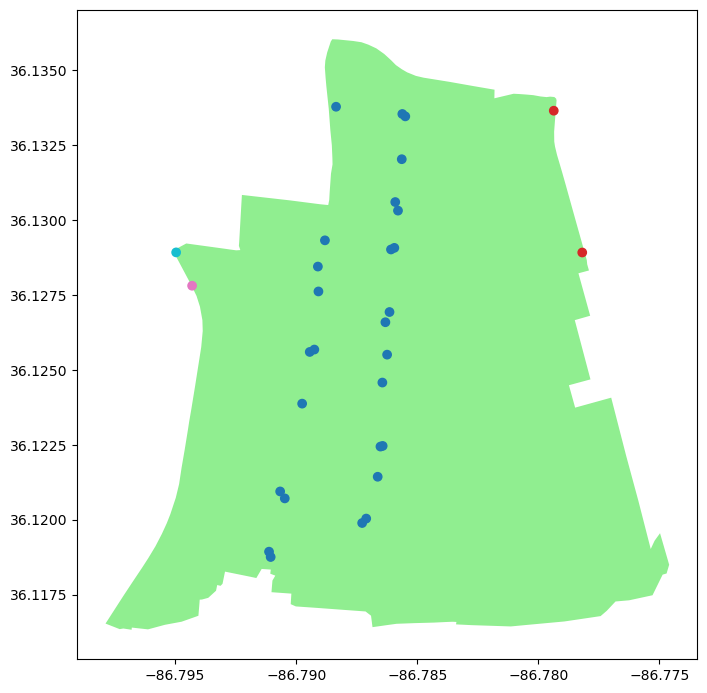

In [30]:
#fig, ax = matplotlib.subplots()
ax = polygon_sunnyside.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_sunnyside.plot(ax = ax, column = 'route');
plt.show();

folium

In [31]:
polygon_sunnyside.geometry.centroid

C:\Users\mathm\AppData\Local\Temp\ipykernel_393004\1481654809.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_sunnyside.geometry.centroid


220    POINT (-86.78554 36.12459)
dtype: geometry

In [32]:
#find the center of the larger (more southern) polygon and look at it
center = polygon_sunnyside.geometry.centroid[220]
print(center)

POINT (-86.78554436456221 36.124589058894855)


C:\Users\mathm\AppData\Local\Temp\ipykernel_393004\3104680500.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_sunnyside.geometry.centroid[220]


In [33]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.124589058894855, -86.78554436456221]


In [34]:
map_sunnyside = folium.Map(location =  area_center, zoom_start = 12)
map_sunnyside

In [35]:
i = 0
for row_index, row_values in stops_in_sunnyside.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 7
values are:
 
stop           12TH AVE S & LAWRENCE AVE NB
route                     12TH AVENUE SOUTH
location            (36.129319, -86.788814)
lat                               36.129319
lng                              -86.788814
geometry       POINT (-86.788814 36.129319)
index_right                             220
name                              Sunnyside
Name: 7, dtype: object
------------------------- 
index is 16
values are:
 
stop           10TH AVE S & S DOUGLAS AVE NB
route                      12TH AVENUE SOUTH
location              (36.13031, -86.785797)
lat                                 36.13031
lng                               -86.785797
geometry         POINT (-86.785797 36.13031)
index_right                              220
name                               Sunnyside
Name: 16, dtype: object
------------------------- 
index is 47
values are:
 
stop           GRANNY WHITE PIKE & FERGUSON AVE NB
route                            12TH AVENUE SOUTH
location

In [36]:
#draw our zip code area: 37207
map_sunnyside = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon_sunnyside).add_to(map_sunnyside)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_sunnyside.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_sunnyside)
map_sunnyside.save('../maps/mapsunnyside.html')

#display our map
map_sunnyside

In [37]:
cluster_map_sunnyside = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_sunnyside)

folium.GeoJson(polygon_sunnyside).add_to(cluster_map_sunnyside)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_sunnyside.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_sunnyside.save('../maps/clustersunnyside.html')

cluster_map_sunnyside  

In [38]:
#draw our zip code area: 37207
map_sunnyside = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon_sunnyside).add_to(map_sunnyside)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_sunnyside[['lat', 'lng']].values.tolist()
map_sunnyside.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_sunnyside